In [1]:
from ay_torch import *
import os

# sqptn1 task

In [121]:
from cnn_sqptn1_1 import SqPtn1Dataset
root='data_generated/sqptn1l/'

def GetDataTransforms(mode):
  if mode=='train':
    return torchvision.transforms.Compose([
        torchvision.transforms.Resize(200),
        # torchvision.transforms.GaussianBlur(kernel_size=3, sigma=(0.1, 2.0)),
        #torchvision.transforms.RandomResizedCrop(224),
        # torchvision.transforms.RandomHorizontalFlip(),
        # torchvision.transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0, hue=0),
        torchvision.transforms.ToTensor(),
        # torchvision.transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
      ])
  if mode=='eval':
    return torchvision.transforms.Compose([
        torchvision.transforms.Resize(200),
        #torchvision.transforms.Resize(256),
        #torchvision.transforms.CenterCrop(224),
        torchvision.transforms.ToTensor(),
        # torchvision.transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
      ])
  if mode=='none':
    return torchvision.transforms.Compose([
        torchvision.transforms.Resize(200),
        #torchvision.transforms.RandomResizedCrop(224),
        # torchvision.transforms.RandomHorizontalFlip(),
        torchvision.transforms.ToTensor()
      ])

In [122]:
dset_train= SqPtn1Dataset(root=root, transform=GetDataTransforms('train'), train=True)
dset_test= SqPtn1Dataset(root=root, transform=GetDataTransforms('eval'), train=False)

In [123]:
print('dset_train size:',len(dset_train))
print('dset_train[0] input type, shape:',type(dset_train[0][0]),dset_train[0][0].shape)
print('dset_train[0] label value:',dset_train[0][1])
#print('dset_train[0][0] value:',dset_train[0][0][:,100:110,100:110])
print('dset_train[0][0] value range:',torch.min(dset_train[0][0]),torch.max(dset_train[0][0]))
print('dset_test size:',len(dset_test))
print('dset_test[0] input type, shape:',type(dset_test[0][0]),dset_test[0][0].shape)
print('dset_test[0] label value:',dset_test[0][1])
print('dset_test[0][0] value range:',torch.min(dset_test[0][0]),torch.max(dset_test[0][0]))

dset_train size: 4000
dset_train[0] input type, shape: <class 'torch.Tensor'> torch.Size([3, 200, 200])
dset_train[0] label value: tensor([0.9576])
dset_train[0][0] value range: tensor(0.) tensor(1.)
dset_test size: 2000
dset_test[0] input type, shape: <class 'torch.Tensor'> torch.Size([3, 200, 200])
dset_test[0] label value: tensor([0.3696])
dset_test[0][0] value range: tensor(0.) tensor(1.)


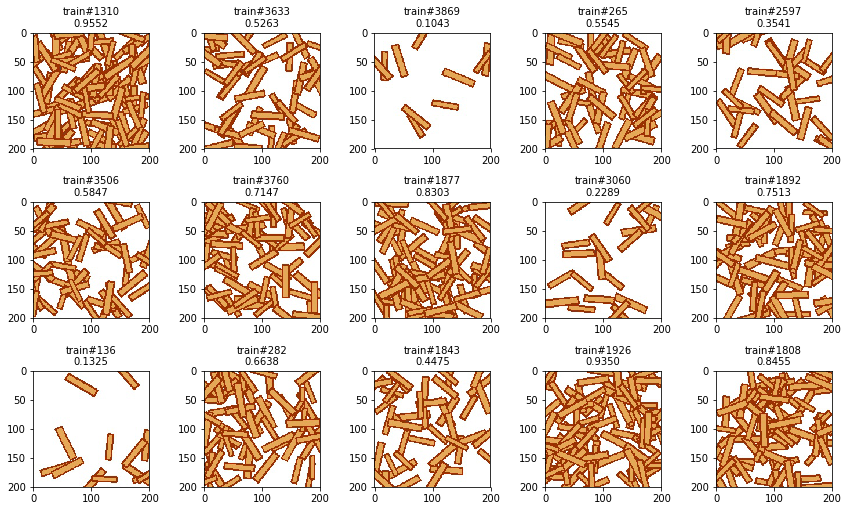

In [124]:
d= dset_train
idxes= np.random.permutation(len(d))[:15]
imgs= [d[i][0] for i in idxes]
labels= [f'train#{i}\n{d[i][1].item():.4f}' for i in idxes]
PlotImgGrid(imgs, labels)

## Engineered estimator (sqptn1)

torch.Size([3, 200, 200])
tensor(0.) tensor(1.)
tensor(901)
tensor(901)
tensor([0.0048])


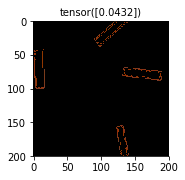

In [126]:
img,label= dset_train[2]
print(img.shape)
print(torch.min(img), torch.max(img))
print(torch.sum(torch.logical_and(0.3<img[0],img[0]<0.6)))
img[:,torch.logical_or(img[0]<=0.3,0.6<=img[0])]= 0
print(torch.count_nonzero(img[0]))
print(label*100/float(torch.count_nonzero(img[0])))
PlotImgGrid([img], [label])

In [130]:
X_train= np.array([torch.sum(torch.logical_or(img[0]<0.9,img[1]<0.9)).item() for img,label in dset_train])
Y_train= np.array([label.item() for img,label in dset_train])
X_test= np.array([torch.sum(torch.logical_or(img[0]<0.9,img[1]<0.9)).item() for img,label in dset_test])
Y_test= np.array([label.item() for img,label in dset_test])
# X_train= np.array([torch.sum(torch.logical_and(0.3<img[0],img[0]<0.6)).item() for img,label in dset_train])
# Y_train= np.array([label.item() for img,label in dset_train])
# X_test= np.array([torch.sum(torch.logical_and(0.3<img[0],img[0]<0.6)).item() for img,label in dset_test])
# Y_test= np.array([label.item() for img,label in dset_test])

In [136]:
# Learning weight from the dataset
# W= np.array([(label*100./torch.sum(torch.logical_or(img[0]<0.9,img[1]<0.9))).item() for img,label in dset_train])
# w= np.mean(W[W!=np.inf])
w= np.mean(Y_train[X_train!=0]*100./X_train[X_train!=0])
w

0.0023777263047348204

In [137]:
pred_train= w*X_train*0.01
pred_test= w*X_test*0.01
rmse_train= np.sqrt(np.sum(np.abs(pred_train-Y_train)**2)/len(pred_train))
rmse_test= np.sqrt(np.sum(np.abs(pred_test-Y_test)**2)/len(pred_test))
print(f'Ver.1 model performance: rmse_train={rmse_train}, rmse_test={rmse_test}')

Ver.1 model performance: rmse_train=0.09866074006660346, rmse_test=0.09624291856141455


# sqptn1s task

In [7]:
from cnn_sqptn1_1 import SqPtn1Dataset as SqPtn1sDataset
root='data_generated/sqptn1s/'

def GetDataTransforms(mode):
  if mode=='train':
    return torchvision.transforms.Compose([
        torchvision.transforms.Resize(200),
        # torchvision.transforms.GaussianBlur(kernel_size=3, sigma=(0.1, 2.0)),
        #torchvision.transforms.RandomResizedCrop(224),
        # torchvision.transforms.RandomHorizontalFlip(),
        # torchvision.transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0, hue=0),
        torchvision.transforms.ToTensor(),
        # torchvision.transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
      ])
  if mode=='eval':
    return torchvision.transforms.Compose([
        torchvision.transforms.Resize(200),
        #torchvision.transforms.Resize(256),
        #torchvision.transforms.CenterCrop(224),
        torchvision.transforms.ToTensor(),
        # torchvision.transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
      ])
  if mode=='none':
    return torchvision.transforms.Compose([
        torchvision.transforms.Resize(200),
        #torchvision.transforms.RandomResizedCrop(224),
        # torchvision.transforms.RandomHorizontalFlip(),
        torchvision.transforms.ToTensor()
      ])

In [8]:
dset_train= SqPtn1sDataset(root=root, transform=GetDataTransforms('train'), train=True)
dset_test= SqPtn1sDataset(root=root, transform=GetDataTransforms('eval'), train=False)
#NOTE: Adjust the batch and epoch sizes.
n_batch= 64
dl_train= torch.utils.data.DataLoader(
              dataset=dset_train,
              batch_size=n_batch,
              shuffle=True,
              num_workers=2)
dl_test= torch.utils.data.DataLoader(
              dataset=dset_test,
              batch_size=n_batch,
              shuffle=False,
              num_workers=2)

In [9]:
print('dset_train size:',len(dset_train))
print('dset_train[0] input type, shape:',type(dset_train[0][0]),dset_train[0][0].shape)
print('dset_train[0] label value:',dset_train[0][1])
#print('dset_train[0][0] value:',dset_train[0][0][:,100:110,100:110])
print('dset_train[0][0] value range:',torch.min(dset_train[0][0]),torch.max(dset_train[0][0]))
print('dset_test size:',len(dset_test))
print('dset_test[0] input type, shape:',type(dset_test[0][0]),dset_test[0][0].shape)
print('dset_test[0] label value:',dset_test[0][1])
print('dset_test[0][0] value range:',torch.min(dset_test[0][0]),torch.max(dset_test[0][0]))

dset_train size: 4000
dset_train[0] input type, shape: <class 'torch.Tensor'> torch.Size([3, 200, 200])
dset_train[0] label value: tensor([0.3275])
dset_train[0][0] value range: tensor(0.) tensor(1.)
dset_test size: 2000
dset_test[0] input type, shape: <class 'torch.Tensor'> torch.Size([3, 200, 200])
dset_test[0] label value: tensor([0.1122])
dset_test[0][0] value range: tensor(0.) tensor(1.)


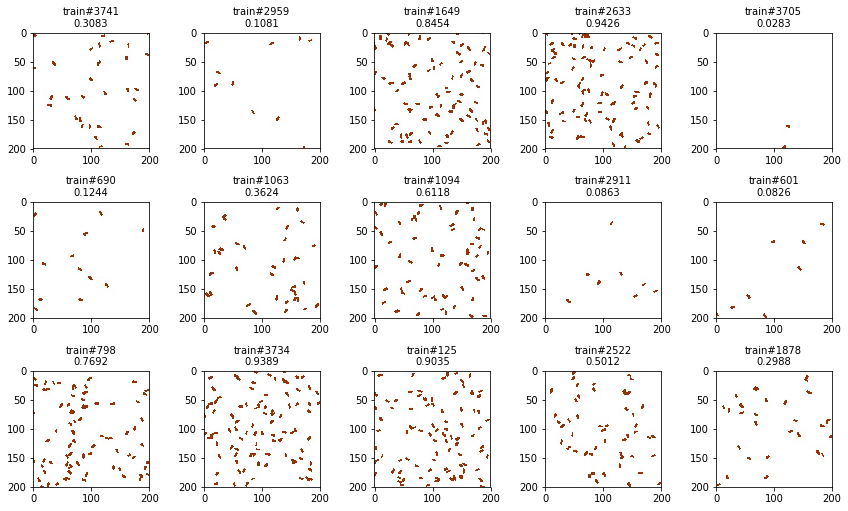

In [10]:
d= dset_train
idxes= np.random.permutation(len(d))[:15]
imgs= [d[i][0] for i in idxes]
labels= [f'train#{i}\n{d[i][1].item():.4f}' for i in idxes]
PlotImgGrid(imgs, labels)

## Engineered estimator (sqptn1s)

torch.Size([3, 200, 200])
tensor(0.) tensor(1.)
tensor(1022)
tensor(1022)
tensor([0.0341])


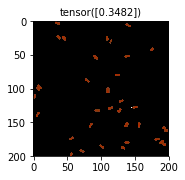

In [54]:
img,label= dset_train[4]
print(img.shape)
print(torch.min(img), torch.max(img))
print(torch.sum(torch.logical_or(img[0]<0.9,img[1]<0.9)))
img[:,torch.logical_and(img[0]>0.9,img[1]>0.9)]= 0
print(torch.count_nonzero(img[0]))
print(label*100/float(torch.count_nonzero(img[0])))
# img[0][torch.logical_and(img[0]>0.3,img[0]<0.6)]= 1
# img[2][torch.logical_and(img[2]>0.3,img[2]<0.6)]= 0
# [set(img[d].reshape(-1).tolist()) for d in range(3)]
PlotImgGrid([img], [label])

In [86]:
X_train= np.array([torch.sum(torch.logical_or(img[0]<0.9,img[1]<0.9)).item() for img,label in dset_train])
Y_train= np.array([label.item() for img,label in dset_train])
X_test= np.array([torch.sum(torch.logical_or(img[0]<0.9,img[1]<0.9)).item() for img,label in dset_test])
Y_test= np.array([label.item() for img,label in dset_test])

In [91]:
# Learning weight from the dataset
# W= np.array([(label*100./torch.sum(torch.logical_or(img[0]<0.9,img[1]<0.9))).item() for img,label in dset_train])
# w= np.mean(W[W!=np.inf])
w= np.mean(Y_train[X_train!=0]*100./X_train[X_train!=0])
w

0.035619584844084055

In [103]:
pred_train= w*X_train*0.01
pred_test= w*X_test*0.01
rmse_train= np.sqrt(np.sum(np.abs(pred_train-Y_train)**2)/len(pred_train))
rmse_test= np.sqrt(np.sum(np.abs(pred_test-Y_test)**2)/len(pred_test))
print(f'Ver.1 model performance: rmse_train={rmse_train}, rmse_test={rmse_test}')

Ver.1 model performance: rmse_train=0.017889147642193917, rmse_test=0.01737042898464843


torch.Size([3, 200, 200])
tensor(0.) tensor(1.)
tensor(834)
tensor(834)
tensor([0.0511])


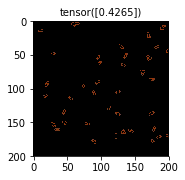

In [116]:
img,label= dset_train[2]
print(img.shape)
print(torch.min(img), torch.max(img))
print(torch.sum(torch.logical_and(0.3<img[0],img[0]<0.6)))
img[:,torch.logical_or(img[0]<=0.3,0.6<=img[0])]= 0
print(torch.count_nonzero(img[0]))
print(label*100/float(torch.count_nonzero(img[0])))
PlotImgGrid([img], [label])

In [118]:
X_train= np.array([torch.sum(torch.logical_and(0.3<img[0],img[0]<0.6)).item() for img,label in dset_train])
Y_train= np.array([label.item() for img,label in dset_train])
X_test= np.array([torch.sum(torch.logical_and(0.3<img[0],img[0]<0.6)).item() for img,label in dset_test])
Y_test= np.array([label.item() for img,label in dset_test])

In [119]:
# Learning weight from the dataset
# W= np.array([(label*100./torch.sum(torch.logical_or(img[0]<0.9,img[1]<0.9))).item() for img,label in dset_train])
# w= np.mean(W[W!=np.inf])
w= np.mean(Y_train[X_train!=0]*100./X_train[X_train!=0])
w

0.05313444020680619

In [125]:
pred_train= w*X_train*0.01
pred_test= w*X_test*0.01
rmse_train= np.sqrt(np.sum(np.abs(pred_train-Y_train)**2)/len(pred_train))
rmse_test= np.sqrt(np.sum(np.abs(pred_test-Y_test)**2)/len(pred_test))
print(f'Ver.2 model performance: rmse_train={rmse_train}, rmse_test={rmse_test}')

Ver.2 model performance: rmse_train=0.017304835985095576, rmse_test=0.016908229192911028


# sqptn1no task

No overlap

In [204]:
from cnn_sqptn1_1 import SqPtn1Dataset as SqPtn1noDataset
root='data_generated/sqptn1no/'

def GetDataTransforms(mode):
  if mode=='train':
    return torchvision.transforms.Compose([
        torchvision.transforms.Resize(200),
        # torchvision.transforms.GaussianBlur(kernel_size=3, sigma=(0.1, 2.0)),
        #torchvision.transforms.RandomResizedCrop(224),
        # torchvision.transforms.RandomHorizontalFlip(),
        # torchvision.transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0, hue=0),
        torchvision.transforms.ToTensor(),
        # torchvision.transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
      ])
  if mode=='eval':
    return torchvision.transforms.Compose([
        torchvision.transforms.Resize(200),
        #torchvision.transforms.Resize(256),
        #torchvision.transforms.CenterCrop(224),
        torchvision.transforms.ToTensor(),
        # torchvision.transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
      ])
  if mode=='none':
    return torchvision.transforms.Compose([
        torchvision.transforms.Resize(200),
        #torchvision.transforms.RandomResizedCrop(224),
        # torchvision.transforms.RandomHorizontalFlip(),
        torchvision.transforms.ToTensor()
      ])

In [205]:
dset_train= SqPtn1noDataset(root=root, transform=GetDataTransforms('train'), train=True)
dset_test= SqPtn1noDataset(root=root, transform=GetDataTransforms('eval'), train=False)

In [206]:
print('dset_train size:',len(dset_train))
print('dset_train[0] input type, shape:',type(dset_train[0][0]),dset_train[0][0].shape)
print('dset_train[0] label value:',dset_train[0][1])
#print('dset_train[0][0] value:',dset_train[0][0][:,100:110,100:110])
print('dset_train[0][0] value range:',torch.min(dset_train[0][0]),torch.max(dset_train[0][0]))
print('dset_test size:',len(dset_test))
print('dset_test[0] input type, shape:',type(dset_test[0][0]),dset_test[0][0].shape)
print('dset_test[0] label value:',dset_test[0][1])
print('dset_test[0][0] value range:',torch.min(dset_test[0][0]),torch.max(dset_test[0][0]))

dset_train size: 4000
dset_train[0] input type, shape: <class 'torch.Tensor'> torch.Size([3, 200, 200])
dset_train[0] label value: tensor([0.4100])
dset_train[0][0] value range: tensor(0.) tensor(1.)
dset_test size: 2000
dset_test[0] input type, shape: <class 'torch.Tensor'> torch.Size([3, 200, 200])
dset_test[0] label value: tensor([0.0400])
dset_test[0][0] value range: tensor(0.) tensor(1.)


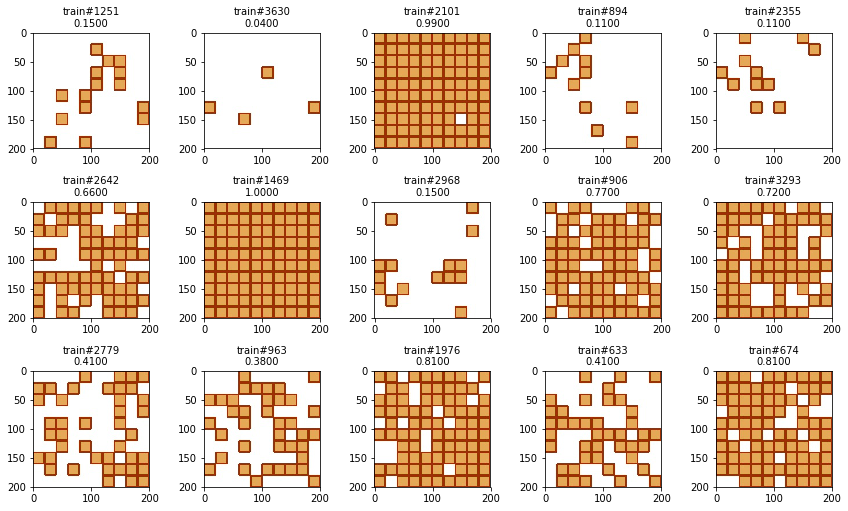

In [207]:
d= dset_train
idxes= np.random.permutation(len(d))[:15]
imgs= [d[i][0] for i in idxes]
labels= [f'train#{i}\n{d[i][1].item():.4f}' for i in idxes]
PlotImgGrid(imgs, labels)

## Engineered estimator (sqptn1no)

torch.Size([3, 200, 200])
tensor(0.) tensor(1.)
tensor(2816)
tensor(2816)
tensor([0.0039])


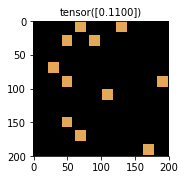

11

In [208]:
import cv2
img,label= dset_train[3]
print(img.shape)
print(torch.min(img), torch.max(img))
print(torch.sum(torch.logical_and(0.7<img[0],img[1]<0.92)))
img[:,torch.logical_or(img[0]<=0.7,0.92<=img[1])]= 0
print(torch.count_nonzero(img[0]))
print(label*100/float(torch.count_nonzero(img[0])))
PlotImgGrid([img], [label])
_,ctrs,_= cv2.findContours((img[0]*255).to(torch.uint8).numpy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
len(ctrs)

In [209]:
def count_box(img):
  img[:,torch.logical_or(img[0]<=0.7,0.92<=img[1])]= 0
  _,ctrs,_= cv2.findContours((img[0]*255).to(torch.uint8).numpy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  return len(ctrs)
X_train= np.array([count_box(img) for img,label in dset_train])
Y_train= np.array([label.item() for img,label in dset_train])
X_test= np.array([count_box(img) for img,label in dset_test])
Y_test= np.array([label.item() for img,label in dset_test])

In [210]:
# Learning weight from the dataset
# W= np.array([(label*100./torch.sum(torch.logical_or(img[0]<0.9,img[1]<0.9))).item() for img,label in dset_train])
# w= np.mean(W[W!=np.inf])
# w= np.mean(Y_train[X_train!=0]*100./X_train[X_train!=0])
w= 1.
w

1.0

In [231]:
pred_train= w*X_train*0.01
pred_test= w*X_test*0.01
rmse_train= np.sqrt(np.sum(np.abs(pred_train-Y_train)**2)/len(pred_train))
rmse_test= np.sqrt(np.sum(np.abs(pred_test-Y_test)**2)/len(pred_test))
print(f'Ver.1 model performance: rmse_train={rmse_train}, rmse_test={rmse_test}')

Ver.1 model performance: rmse_train=0.0017029368655871813, rmse_test=0.0017464229231281495


In [234]:
pred_train[np.round(pred_train,2)!=np.round(Y_train,2)], np.round(Y_train,2)[np.round(pred_train,2)!=np.round(Y_train,2)]

(array([0.56, 0.28, 0.57, 0.56, 0.56, 0.56, 0.28, 0.28, 0.57, 0.56, 0.28,
        0.56, 0.56, 0.57, 0.57, 0.56, 0.56, 0.56, 0.28, 0.57, 0.57, 0.28,
        0.57, 0.56, 0.56, 0.57, 0.57, 0.28, 0.56, 0.56, 0.28, 0.57, 0.28,
        0.57, 0.28, 0.57, 0.56, 0.57, 0.57, 0.56, 0.56, 0.28, 0.28, 0.56,
        0.28, 0.56, 0.57, 0.28, 0.56, 0.57, 0.56, 0.57, 0.56, 0.57, 0.28,
        0.28, 0.28, 0.56, 0.57, 0.28, 0.57, 0.56, 0.28, 0.56, 0.28, 0.28,
        0.56, 0.28, 0.56, 0.57, 0.28, 0.28, 0.56, 0.56, 0.57, 0.28, 0.56,
        0.56, 0.57, 0.28, 0.57, 0.28, 0.57, 0.57, 0.57, 0.28, 0.56, 0.57,
        0.57, 0.56, 0.56, 0.56, 0.56, 0.28, 0.28, 0.56, 0.57, 0.56, 0.28,
        0.57, 0.57, 0.56, 0.56, 0.56, 0.28, 0.56, 0.57, 0.56, 0.56, 0.56,
        0.28, 0.28, 0.28, 0.57, 0.57, 0.28]),
 array([0.57, 0.29, 0.58, 0.57, 0.57, 0.57, 0.29, 0.29, 0.58, 0.57, 0.29,
        0.57, 0.57, 0.58, 0.58, 0.57, 0.57, 0.57, 0.29, 0.58, 0.58, 0.29,
        0.58, 0.57, 0.57, 0.58, 0.58, 0.29, 0.57, 0.57, 0.29, 0.58